# GraphQL API


## 1) Contruccion de un query string

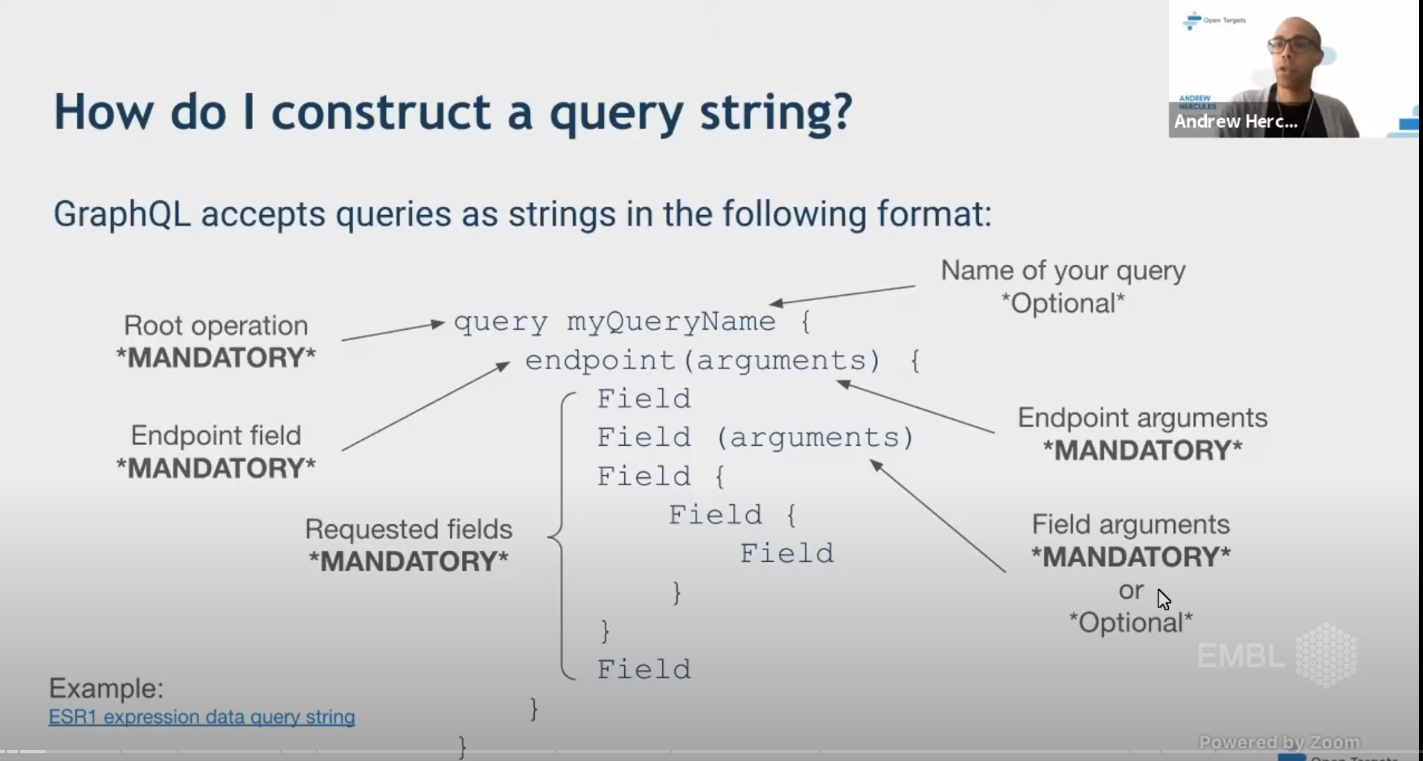

In [41]:
import os
from PIL import Image

direccion = os.getcwd()

formato_query  = Image.open(fp=f"{direccion}" + "\\data\\formato_query.PNG")
formato_query = formato_query.convert('RGB')  # Convierte la imagen a formato RGB
formato_query

## 2) Ejemplos
GraphQL API tiene distintos end points para los distintos entidades que existen en Open Target Platform (como lo son drugs, disases and targets). Dado que cada entidad tienen distinto tipo de información relacionada, existen distintos end points para cada uno de estas entidades (cada end point de cada entidad tiene estructuras distintas y puedes parametrizar el llamado con estos parametros para cada entidad).

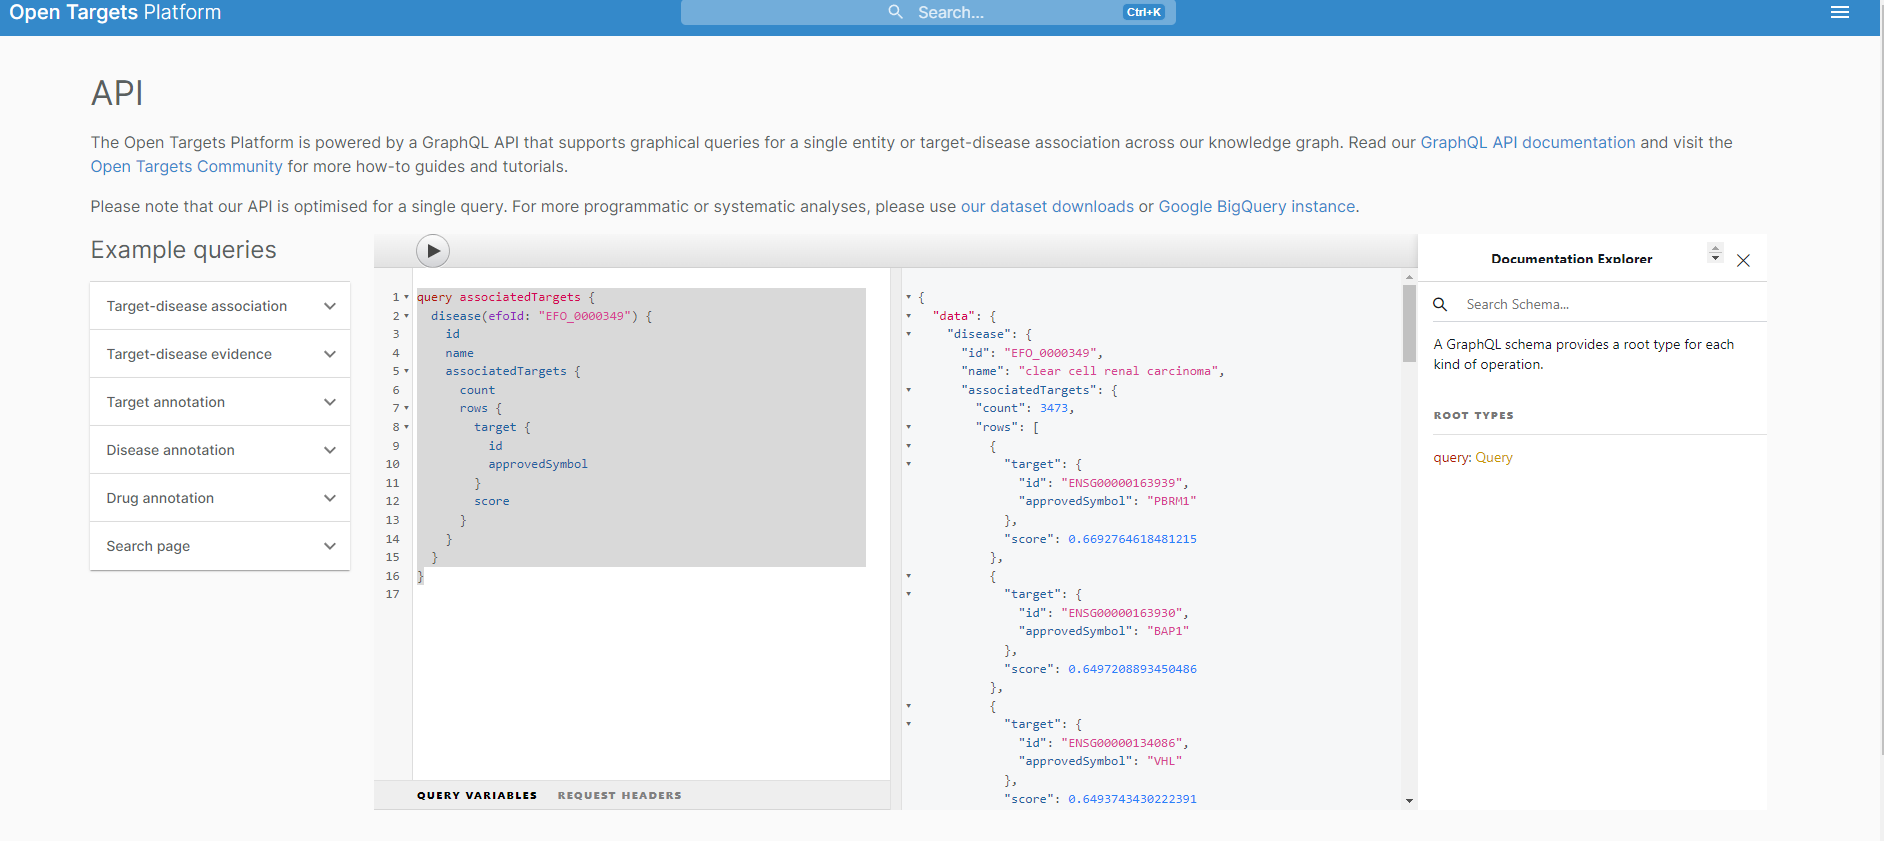

In [5]:
API_exampels= Image.open(fp=f"{direccion}" + "\\data\\API.PNG")
API_exampels = API_exampels.convert('RGB')  # Convierte la imagen a formato RGB
API_exampels

Vease como existen disitntos **EXAMPLES QUERIES** esto debido a que para cada entidad necesitamos enviar una estructura distinta hacia el end point

### 2.1) Target-disase asociation  examples
Recordemos que el target en el contexto de Open Target Platform se refiere a una entidad molecular en el cuerpo, como un gen o una proteína, que se considera un buen punto de intervención para el tratamiento de una enfermedad. Los medicamentos funcionan interactuando con estos objetivos, modificando su actividad de alguna manera para tratar una enfermedad.

Por está razon este query lo que nos mostrará es dado una molecula, gen o proteina del cuerpo cuales son las enfermedades están asociadas a este target. Tambien lo pude hacer viceversa, es decir dado una enfermedad que targets se le asocian.


#### 2.1.1) DADO UN TARGET (moleculas, genes o proteinas) QUE ENCUENTRA LAS ENFERMEDADES RELACIONADAS
En este ejemplo es el siguiente genoma:  ENSG00000106991 y ENSG00000127318

In [11]:
import requests
import json

gene_id = "ENSG00000106991"
#gene_id = "ENSG00000127318"

# Esto es una consulta en lenguaje GraphQL:
query_string = f"""
query associatedDiseases {{
  target(ensemblId: "{gene_id}") {{
    id
    approvedSymbol
    associatedDiseases {{
      count
      rows {{
        disease {{
          id
          name
        }}
        datasourceScores {{
          id
          score
        }}
      }}
    }}
  }}
}}
"""


# Set base URL of GraphQL API endpoint
base_url = "https://api.platform.opentargets.org/api/v4/graphql"

# Perform POST request and check status code of response
r = requests.post(base_url, json={"query": query_string})
print(r.status_code)
if r.status_code == 200:
    print("Consulta realizada correctamente")

# Transform API response from JSON into Python dictionary and print in console
api_response = json.loads(r.text)
api_response

200
Consulta realizada correctamente


{'data': {'target': {'id': 'ENSG00000106991',
   'approvedSymbol': 'ENG',
   'associatedDiseases': {'count': 630,
    'rows': [{'disease': {'id': 'MONDO_0008535',
       'name': 'telangiectasia, hereditary hemorrhagic, type 1'},
      'datasourceScores': [{'id': 'uniprot_variants',
        'score': 0.9607983220922475},
       {'id': 'eva', 'score': 0.9454915102838094},
       {'id': 'genomics_england', 'score': 0.9190679877429972},
       {'id': 'eva_somatic', 'score': 0.7129677298656288},
       {'id': 'uniprot_literature', 'score': 0.607930797611621},
       {'id': 'impc', 'score': 0.27727723679066035},
       {'id': 'europepmc', 'score': 0.1934762480910549}]},
     {'disease': {'id': 'MONDO_0019180',
       'name': 'hereditary hemorrhagic telangiectasia'},
      'datasourceScores': [{'id': 'gene_burden', 'score': 0.9576003126781251},
       {'id': 'eva', 'score': 0.9365771484962724},
       {'id': 'genomics_england', 'score': 0.7599134970145264},
       {'id': 'clingen', 'score': 0.

In [40]:
# Creamos una lista vacia
listado = []

# Tomamos la cantidad de enfermedades asociadoadas a ese target
cantidad =   len(api_response["data"]["target"]["associatedDiseases"]["rows"])

# Creamos un ciclo que meta todo en una lista
for i in range(0, cantidad):
    name = api_response["data"]["target"]["associatedDiseases"]["rows"][i]["disease"]["name"]
    listado.append(name) # Todos los nombnres que almacenan en esta listada (tendra todo como strings)

print(f"Cantidad de disases relacionadas al target {gene_id}:", len(api_response["data"]["target"]["associatedDiseases"]["rows"]))
print(f"Listado de disases relacionados al target {gene_id}:")
listado

Cantidad de disases relacionadas al target ENSG00000106991: 25
Listado de disases relacionados al target ENSG00000106991:


['telangiectasia, hereditary hemorrhagic, type 1',
 'hereditary hemorrhagic telangiectasia',
 'vascular disease',
 'arteriovenous hemangioma/malformation',
 'Abnormality of the cardiovascular system',
 'Abnormality of the vasculature',
 'capillary disorder',
 'congenital anomaly of cardiovascular system',
 'heritable pulmonary arterial hypertension',
 'idiopathic and/or familial pulmonary arterial hypertension',
 'Cerebral arteriovenous malformation',
 'pulmonary arterial hypertension',
 'congenital anomaly of the great arteries',
 'epistaxis',
 'arterial disorder',
 'genetic disorder',
 'hemorrhagic disease',
 'arteriovenous malformations of the brain',
 'Telangiectasia of the skin',
 'systemic lupus erythematosus',
 'congenital vascular malformation',
 'pulmonary valve disease',
 'angiosarcoma',
 'hemoglobin measurement',
 'respiratory system disease']